Data cleaning & preprocessing

Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

#supress warnings related to libraries
import warnings
warnings.filterwarnings("ignore")

Read the Data from CSV file in Visual Studio Code (VSC)

In [2]:
df =pd.read_csv("/workspaces/SDS-009-ds-salary-pred/data/salaries.csv", skipinitialspace=True)
#General structure of DS
df.info()
#check if there are any null or missing values
print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


Drop duplicates

In [3]:
df = df.drop_duplicates()

Strip before and after Whitespaces from entire data frame records

In [4]:
#Remove leading and following spaces in data
# #strip to all rows
df =df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#strip to all columns
df.columns = df.columns.str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


Restore Location for NaN values 

In [5]:
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [6]:
#here we group by 'Company' then apply function
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df = df.dropna(subset=['Location'])

df.info()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 867
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        860 non-null    object 
 1   Company Score  782 non-null    float64
 2   Job Title      860 non-null    object 
 3   Location       860 non-null    object 
 4   Date           860 non-null    object 
 5   Salary         757 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
Company            0
Company Score     78
Job Title          0
Location           0
Date               0
Salary           103
dtype: int64


Unfold Salary column

In [7]:
df['MIN'] = df['Salary'].str.extract('(\d{1,4})')
df['MAX'] = df['Salary'].str.extract('(.-.\$\d{1,4}K)')
df['MAX'] = df['MAX'].str.extract('(\d{1,4})')
df['Hourly'] = df['Salary'].str.extract('(Per Hour)')
df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')
df['Source'] = df['Source'].str.extract('([a-zA-Z]+)')
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
655,Cash App,4.5,Full-Stack Software Developer,"Hartford, CT",17d,$89K - $128K (Glassdoor est.),89.0,128.0,NaN,Glassdoor
821,Freeform,NaN,Senior Software QA Engineer,"Cambridge, MA",3d,NaN,NaN,NaN,NaN,NaN
327,Colorado State University,4.5,Cloud Engineer,"Westlake, TX",9d,$120K - $140K (Employer est.),120.0,140.0,NaN,Employer
373,Delta Dental Ins.,4.0,DO178C Software Engineer,"Everett, WA",30d+,$93K - $147K (Glassdoor est.),93.0,147.0,NaN,Glassdoor
151,Sahbi Systems,4.1,Software Engineers,Alabama,18d,$80K - $99K (Glassdoor est.),80.0,99.0,NaN,Glassdoor
...,...,...,...,...,...,...,...,...,...,...
584,"Garmin International, Inc.",3.1,Jr Cloud Engineer,"Phoenix, AZ",9d,$70K - $90K (Employer est.),70.0,90.0,NaN,Employer
416,Tuvoli,3.1,System Software Engineer,"San Jose, CA",3d,$78K (Employer est.),78.0,NaN,NaN,Employer
688,ASM International,3.4,"Software Engineer - C#, C++","Lawrenceville, GA",30d+,$115K - $159K (Glassdoor est.),115.0,159.0,NaN,Glassdoor
317,BCT LLC,3.9,"Software Development Engineer, Platform Services",Oregon,6d,$75.00 - $80.00 Per Hour (Employer est.),75.0,NaN,Per Hour,Employer


Drop NaN Salaries

In [8]:
df = df[df['MIN'].notna()]
df['MAX'].fillna(df['MIN'],inplace=True)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
186,Hubbell Incorporated,3.4,Sr Assoc Software Engineer,"Avon, CT",1d,$95K - $126K (Glassdoor est.),95.0,126.0,NaN,Glassdoor
401,Zenith Services,4.7,Data Engineer / Software Engineer,"Chantilly, VA",30d+,$108K - $156K (Glassdoor est.),108.0,156.0,NaN,Glassdoor
453,Florida State College at Jacksonville,4.2,Deployment Engineer (Hybrid),"Newark, NJ",9d,$69K - $91K (Glassdoor est.),69.0,91.0,NaN,Glassdoor
495,Alterra Mountain Company,4.2,"Software Engineer, Full Stack","San Francisco, CA",6d,$163K - $200K (Employer est.),163.0,200.0,NaN,Employer
380,Literati,3.7,Software Systems Engineer/DevOps Engineer,"Chantilly, VA",18d,$84K - $110K (Glassdoor est.),84.0,110.0,NaN,Glassdoor
...,...,...,...,...,...,...,...,...,...,...
641,Oncorre,3.8,Software Development Engineer,"Seattle, WA",5d,$76K - $116K (Glassdoor est.),76.0,116.0,NaN,Glassdoor
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.),94.0,148.0,NaN,Glassdoor
670,CDK Global,3.7,Principal Software Engineer,"Seattle, WA",30d+,$78K - $102K (Glassdoor est.),78.0,102.0,NaN,Glassdoor
750,DCS Corp,3.9,Sr. Software Engineer - Site Reliability,"Austin, TX",16d,$49K - $84K (Glassdoor est.),49.0,84.0,NaN,Glassdoor


Mark Per hour salaries

In [9]:
df['Hourly']=df['Hourly'].fillna(0)
df['Hourly']=df['Hourly'].replace(["Per Hour"],1)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
531,Adobe,4.5,"Software Quality Assurance Engineer, Assistanc...","Quincy, MA",30d+,$120K (Employer est.),120.0,120.0,0,Employer
722,Hewlett Packard,3.8,Product Engineer I,"Longmont, CO",24h,$97K - $133K (Glassdoor est.),97.0,133.0,0,Glassdoor
262,Gelber Group,5.0,Senior Software Engineer,"Los Altos, CA",9d,$110K - $143K (Glassdoor est.),110.0,143.0,0,Glassdoor
403,Oracle,2.9,React Native Engineer,"Bentonville, AR",30d+,$73K - $100K (Glassdoor est.),73.0,100.0,0,Glassdoor
343,Tencent,4.0,Senior Software Engineer,"Vienna, VA",2d,$84K - $132K (Glassdoor est.),84.0,132.0,0,Glassdoor
...,...,...,...,...,...,...,...,...,...,...
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),80.0,80.0,1,Employer
382,Plaid,3.7,WordPress Full Stack Engineer (React),Texas,1d,$102K - $149K (Glassdoor est.),102.0,149.0,0,Glassdoor
207,Northwestern Memorial Healthcare,4.2,Software Developers,"Chicago, IL",10d,$86K - $120K (Glassdoor est.),86.0,120.0,0,Glassdoor
406,Versaterm,3.5,Senior Full-Stack Web Applications Software En...,"Santa Clara, CA",1d,$80K - $94K (Employer est.),80.0,94.0,0,Employer


Turn hourly to annual

In [10]:
df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),80.0,80.0,1,Employer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),50.0,50.0,1,Employer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),50.0,50.0,1,Employer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),40.0,40.0,1,Employer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),80.0,80.0,1,Employer


In [11]:
#40 hours per week 52 weeks = 2080/1000 -> 2.08K

df['MIN'] = df.apply(lambda row: row['MIN'] * 2.080 if row['Hourly'] == 1 else row['MIN'], axis=1)
df['MAX'] = df['MIN']

df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),166.4,166.4,1,Employer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),83.2,83.2,1,Employer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),166.4,166.4,1,Employer


Check the Data Set after cleaning

In [12]:
#General structure of DS
# df.info()
# df=df['Company'].to_string
#check if there are any null or missing values
# print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)
df['Company'] = df['Company'].astype(str)
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df['Hourly'] = df['Hourly'].astype(int)
df['Source'] = df['Source'].astype(str)



# df.info()
print(df.dtypes)

print(df.isna().sum())

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
MIN              float64
MAX              float64
Hourly             int64
Source            object
dtype: object
Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
MIN              0
MAX              0
Hourly           0
Source           0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 763
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        757 non-null    object 
 1   Company Score  757 non-null    float64
 2   Job Title      757 non-null    object 
 3   Location       757 non-null    object 
 4   Date           757 non-null    object 
 5   Salary         757 non-null    object 
 6   MIN            757 non-null    float64
 7   MAX            757 non-null    float64
 8   Hourly         757 non-null    int64  
 9   Source         757 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 65.1+ KB


Job roles classification

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def categorize_job_title(title):
    title = title.lower()  # Convert to lowercase for consistency
    if 'backend' in title or 'frontend' in title or 'software engineer' in title:
        return 'Software Engineer'
    elif 'developer' in title or 'development' in title:
        return 'Developer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ai' in title or 'ml' in title:
        return 'Machine Learning/AI Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'full stack' in title:
        return 'Full Stack Developer'
    elif 'test' in title or 'quality' in title: 
        return 'QA Engineer'
    else:
        return 'Other IT Jobs'
    

df['Job Category'] = df['Job Title'].apply(categorize_job_title)

print(df)



                           Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer, Fullstack, 1+ Years of Expe... 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Other IT Jobs'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'QA Engineer'),
  Text(4, 0, 'DevOps Engineer'),
  Text(5, 0, 'Machine Learning/AI Engineer'),
  Text(6, 0, 'Full Stack Developer')])

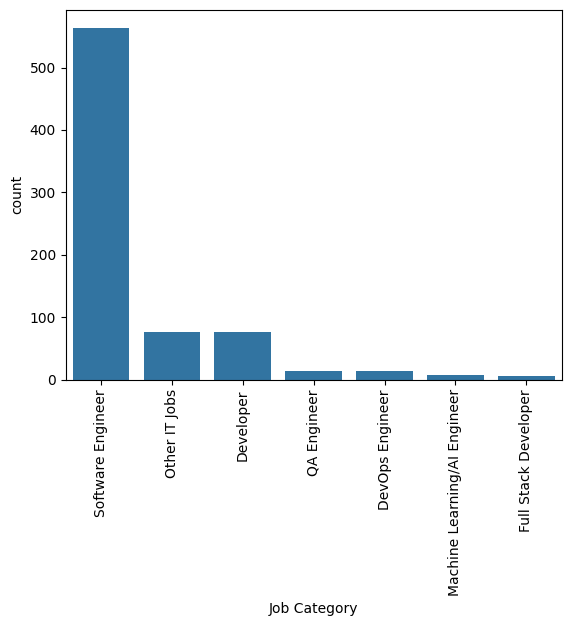

In [16]:
sns.countplot(x='Job Category', data=df)
plt.xticks(rotation = 90)

Factorize straing values

In [17]:
df['Company_Code'] = pd.factorize(df['Company'])[0]
df['Location_Code'] = pd.factorize(df['Location'])[0]
df['Job_Code'] = pd.factorize(df['Job Category'])[0]



Drop odd columns

In [18]:
df = df.drop(['Job Title'], axis =1)
df = df.drop(['Date'], axis =1)
df = df.drop(['Salary'], axis =1)
df = df.drop(['Company'], axis =1)
df = df.drop(['Location'], axis =1)
df = df.drop(['Source'], axis =1)
df = df.drop(['Job Category'], axis =1)
df = df.drop(['Hourly'], axis =1)
df

,Company Score,MIN,MAX,Company_Code,Location_Code,Job_Code
0,4.8,68.0,68.0,0,0,0
1,4.3,61.0,61.0,1,1,1
2,3.9,95.0,95.0,2,2,0
3,3.5,97.0,97.0,3,3,0
4,3.1,85.0,85.0,4,4,0
...,...,...,...,...,...,...
759,3.1,160.0,160.0,175,255,0
760,3.9,222.0,222.0,576,158,0
761,3.8,82.0,82.0,577,9,0
762,3.3,69.0,69.0,578,298,0


Add average salary AVG

In [19]:
df['AVG'] = df[['MIN', 'MAX']].mean(axis=1)

df

,Company Score,MIN,MAX,Company_Code,Location_Code,Job_Code,AVG
0,4.8,68.0,68.0,0,0,0,68.0
1,4.3,61.0,61.0,1,1,1,61.0
2,3.9,95.0,95.0,2,2,0,95.0
3,3.5,97.0,97.0,3,3,0,97.0
4,3.1,85.0,85.0,4,4,0,85.0
...,...,...,...,...,...,...,...
759,3.1,160.0,160.0,175,255,0,160.0
760,3.9,222.0,222.0,576,158,0,222.0
761,3.8,82.0,82.0,577,9,0,82.0
762,3.3,69.0,69.0,578,298,0,69.0


2. Features selection

     https://youtu.be/hCwTDTdYirg?si=gykASdD21iaigCOb

Train/test split 

In [ ]:
#import Libraries
from sklearn.model_selection import train_test_split

X = df.drop(['MIN'], axis =1)
X = X.drop(['MAX'], axis =1)
X = X.drop(['AVG'], axis =1)

# y = df[['MIN','MAX','AVG' ]] 
y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)
#stratify=y - makes no sense? 

print(X_train.shape)
print(X_test.shape)


(529, 4)
(228, 4)


Define Baseline Model: Gradient Boosting Classifier with all features

In [21]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Label encoding
lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
encoded_y_test = lab_enc.fit_transform(y_test)

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
# gbc.fit(X_train, y_train)
gbc.fit(X_train, encoded_y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
# f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
f1_score_all = round(f1_score(encoded_y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.009


Variance threshold

In [ ]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#Check for variance for each feature

X_train_v1.var(axis=0)

Company Score        0.263198
Company_Code     28001.497186
Location_Code     7430.018238
Job_Code             1.230030
dtype: float64

Values Scaling

In [23]:
#Without scaling the values above makes no sense. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

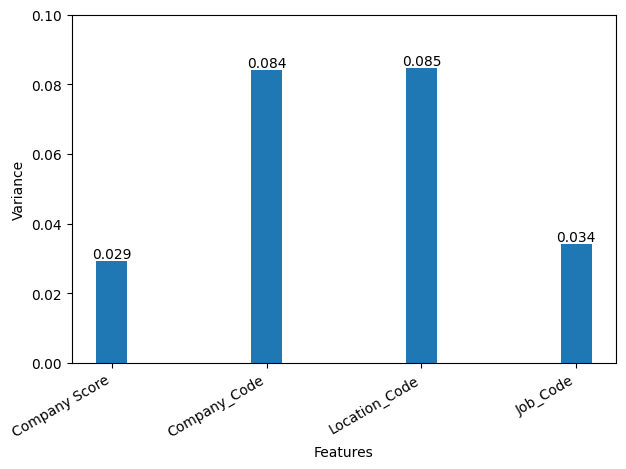

In [24]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [25]:
#I set the trashold of 0.03. So that the Company Score should be dropped. 

sel_X_train_v1 = X_train_v1.drop(['Company Score'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['Company Score'], axis=1)

# gbc.fit(sel_X_train_v1, y_train)
gbc.fit(sel_X_train_v1, encoded_y_train)

var_preds = gbc.predict(sel_X_test_v1)

# encoding
encoded_y_test_v1 = lab_enc.fit_transform(y_test_v1)

f1_score_var = round(f1_score(encoded_y_test_v1, var_preds, average='weighted'), 3)

print(f1_score_var)

0.013


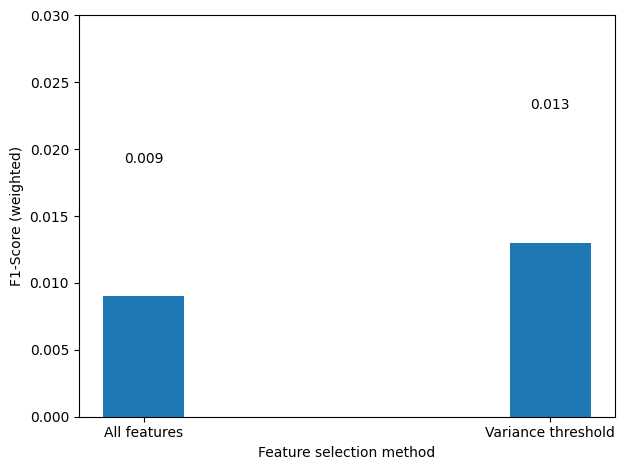

In [26]:
#plot it

fig, ax = plt.subplots()

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.03)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()

K-best features

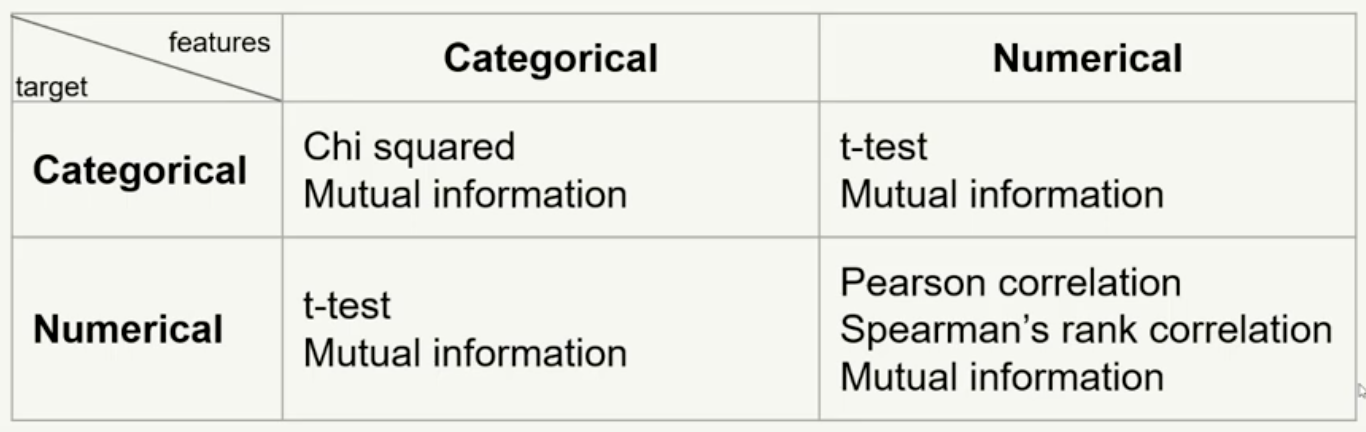

Works good for smal data sets only :(

In [27]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

#encoding
encoded_y_train_v2 = lab_enc.fit_transform(y_train_v2)
encoded_y_test_v2 = lab_enc.fit_transform(y_test_v2)


for k in range(1, 5):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, encoded_y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, encoded_y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(encoded_y_test_v2, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

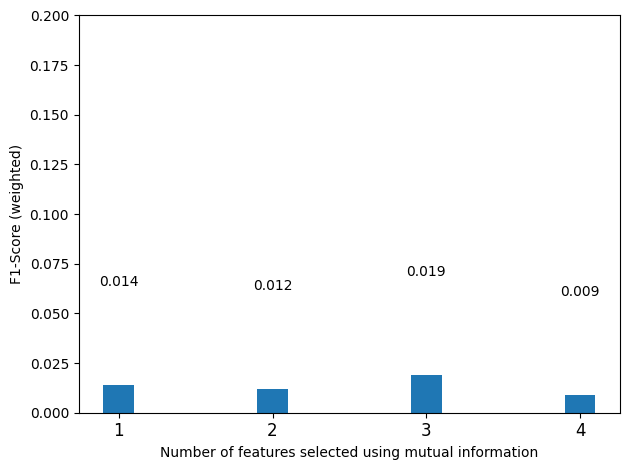

In [29]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.2)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [ ]:
selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X_train_v2, encoded_y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['Company Score', 'Location_Code', 'Job_Code'], dtype='object')

RFE - Recursive feature elimination 

In [31]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [32]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

encoded_y_train_v3 = lab_enc.fit_transform(y_train_v3)
encoded_y_test_v3 = lab_enc.fit_transform(y_test_v3)


for k in range(1, 5):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, encoded_y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, encoded_y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(encoded_y_test_v3, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

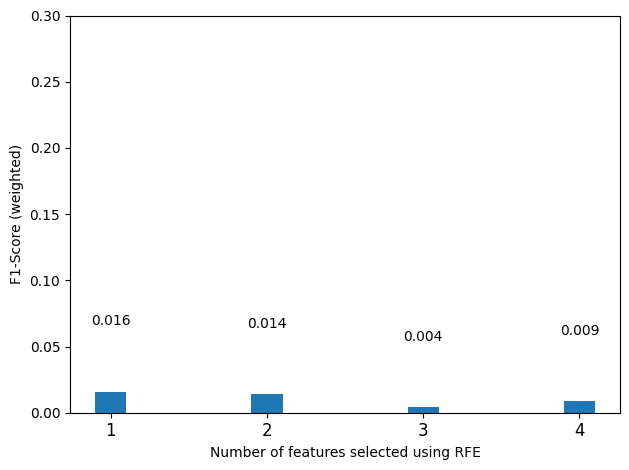

In [33]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [34]:
RFE_selector = RFE(estimator=gbc, n_features_to_select=3, step=1)
RFE_selector.fit(X_train_v3, encoded_y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['Company Score', 'Company_Code', 'Location_Code'], dtype='object')

Boruta

term:> pip install Boruta

In [35]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [39]:
from boruta import BorutaPy

from sklearn.ensemble import RandomForestRegressor
# from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

encoded_y_train_v4 = lab_enc.fit_transform(y_train_v4)
encoded_y_test_v4 = lab_enc.fit_transform(y_test_v4)

# LinearRegression
model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)



# gbc
boruta_selector = BorutaPy(verbose=2,
                           estimator = model,
                           n_estimators = 'auto',
                           max_iter = 300,
                           random_state=79,
                           alpha=0.01)

# # boruta_selector.fit(X_train_v4.values, encoded_y_train_v4.values.ravel())

boruta_selector.fit(X_train_v4, encoded_y_train_v4)


# sel_X_train_v4 = boruta_selector.transform(X_train_v4)
# sel_X_test_v4 = boruta_selector.transform(X_test_v4)

# gbc.fit(sel_X_train_v4, encoded_y_train_v4)

# boruta_preds = gbc.predict(sel_X_test_v4)

# boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

ValueError: Invalid parameter 'n_estimators' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [37]:
for i in range(len(boruta_selector.support_)):
    if boruta_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", boruta_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", boruta_selector.ranking_[i])

Doesn't pass the test:  Company Score  - Ranking:  3
Passes the test:  Company_Code  - Ranking:  1
Doesn't pass the test:  Location_Code  - Ranking:  2
Doesn't pass the test:  Job_Code  - Ranking:  4


In [50]:

sel_X_train_v4 = boruta_selector.transform(np.array(X_train_v4))
sel_X_test_v4 = boruta_selector.transform(np.array(X_test_v4))

gbc.fit(sel_X_train_v4, encoded_y_train_v4)

# boruta_preds = gbc.predict(sel_X_test_v4)

# boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

ValueError: Found array with 0 feature(s) (shape=(529, 0)) while a minimum of 1 is required by GradientBoostingClassifier.

In [53]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features


(0,)

In [ ]:
fig, ax = plt.subplots()

x = ['All features (4)', 'Variance threshold (3)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.018, max(rfe_f1_score_list), boruta_f1_score]



ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()